In [32]:
from pydantic import BaseModel
from typing import Optional

In [39]:

class PortfolioState(BaseModel):
    amount_in_usd: Optional[float] = 0
    total_usd: Optional[float] = 0
    total_amount_in_inr: Optional[float] = 0

In [40]:
def calculate_total_usd(state: PortfolioState) -> PortfolioState:
    state.total_usd = state.amount_in_usd * 1.08
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state.total_amount_in_inr = state.total_usd * 85
    return state

In [41]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calculate_total_usd_node", calculate_total_usd)
builder.add_node("convert_to_inr_node", convert_to_inr)

builder.add_edge(START, "calculate_total_usd_node")
builder.add_edge("calculate_total_usd_node", "convert_to_inr_node")
builder.add_edge("convert_to_inr_node", END)

graph = builder.compile()

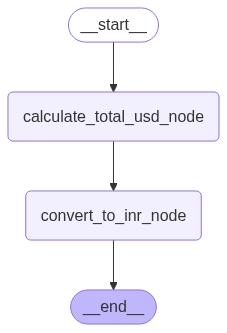

In [42]:
graph

In [36]:
initial_state = {"amount_in_usd": 10}
obj = PortfolioState(**initial_state)

In [37]:
graph.invoke(obj)

{'amount_in_usd': 10.0,
 'total_usd': 10.8,
 'total_amount_in_inr': 918.0000000000001}